## Data Preprocessing

### Import libraries

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras import mixed_precision


### Load the dataset and inspect the data

In [3]:
base_dir = Path("Malaria_Detection_Dataset")
train_dir = base_dir / 'train'
test_dir = base_dir / 'test'

In [3]:
# Inspect directories
print(f"Train categories: {list(train_dir.iterdir())}")
print(f"Test categories: {list(test_dir.iterdir())}")

Train categories: [WindowsPath('Malaria_Detection_Dataset/train/augmented'), WindowsPath('Malaria_Detection_Dataset/train/Parasite'), WindowsPath('Malaria_Detection_Dataset/train/Uninfected')]
Test categories: [WindowsPath('Malaria_Detection_Dataset/test/Parasite'), WindowsPath('Malaria_Detection_Dataset/test/Uninfected')]


In [8]:
def show_dataset_images(data_dir, category, num_images=5):
    category_path = data_dir / category
    dataset_images = os.listdir(category_path)[:num_images]
    
    plt.figure(figsize=(10, 3))
    for i, image_name in enumerate(dataset_images):
        image_path = category_path / image_name
        image = Image.open(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(category)
    plt.show()

====== Train_directory ======


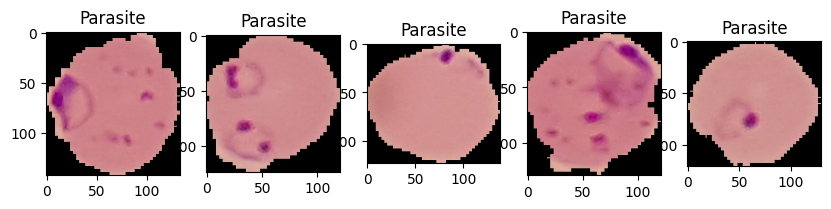

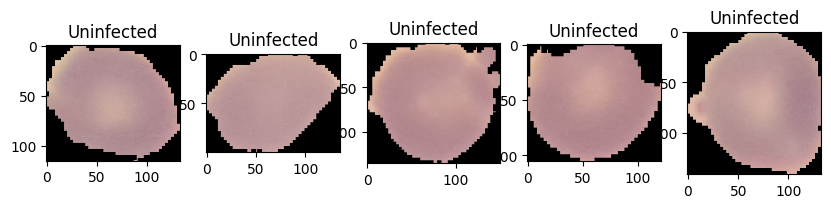

====== Test_directory ======


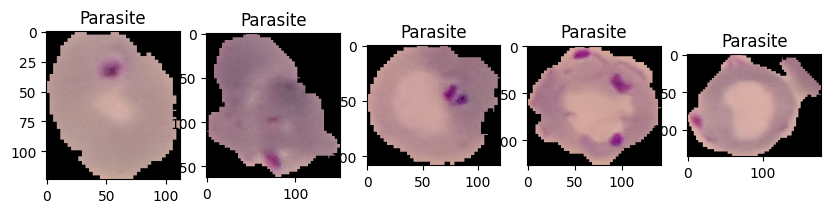

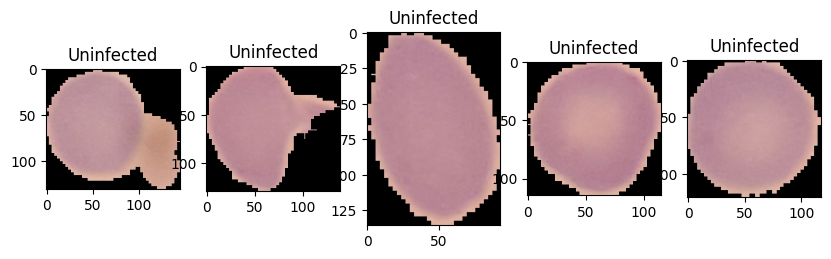

In [5]:
# Displaying the dataset
print('====== Train_directory ======')
show_dataset_images(train_dir, 'Parasite')
show_dataset_images(train_dir, 'Uninfected')
print('====== Test_directory ======')
show_dataset_images(test_dir, 'Parasite')
show_dataset_images(test_dir, 'Uninfected')

### Preprocess the images:

Resize images to a uniform size (e.g., 128x128 or 64x64 pixels).

Normalize pixel values to a range of [0, 1]

In [9]:
# Create a function to Load and Preprocessing images
def load_and_preprocess_images(data_dir, target_size=(64, 64)):
    images, labels = [], []
    for category in ['Parasite', 'Uninfected']:
        category_path = data_dir / category
        label = 1 if category == 'Parasite' else 0
        
        for img_name in os.listdir(category_path):
            img_path = category_path / img_name
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img_array = np.array(img) / 255.0  # Normalize to [0, 1]
                images.append(img_array)
                labels.append(label)
    
    return np.array(images), np.array(labels)

In [6]:
# Load and preprocess train and test images
train_images, train_labels = load_and_preprocess_images(train_dir)
test_images, test_labels = load_and_preprocess_images(test_dir)

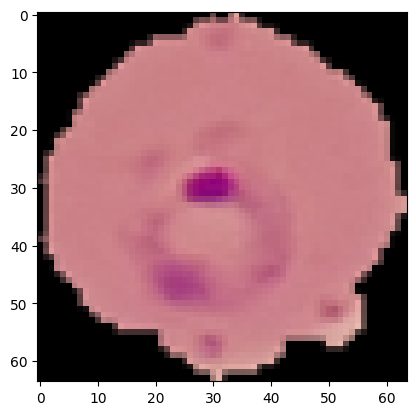

In [7]:
plt.imshow(train_images[2])

In [8]:
train_images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [9]:
test_images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [10]:
test_images.shape

(115, 128, 128, 3)

In [11]:
train_images.shape

(354, 128, 128, 3)

### Perform data augmentation:

In [12]:
print(f"Number of images in train data: {len(train_images)}")

Number of images in train data: 354


In [13]:
data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.1),
        layers.RandomFlip('horizontal'),
        layers.RandomZoom(0.2)
    ]
)

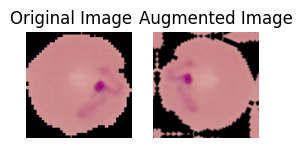

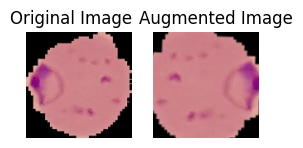

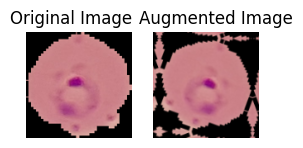

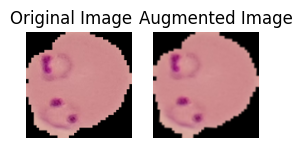

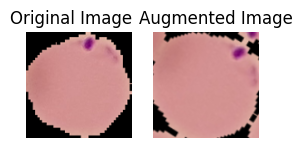

In [14]:
# Loop through the first 5 images
for i in range(5):
    plt.figure(figsize=(3,3))
    img = train_images[i]  # Get image
    img_array = tf.expand_dims(img, 0)
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Original Image   ")
    
    # Apply data augmentation
    augmented_image = data_augmentation(img_array)  # Augment image
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_image[0].numpy())  # Remove batch dimension and display
    plt.axis('off')
    plt.title("    Augmented Image")

    plt.show()


In [15]:
augmented_train_images = []  # To store augmented images

# Apply augmentation and store augmented images
for img in train_images:  # Iterate through original training images
    # Add batch dimension (1, height, width, channels)
    
    # Apply data augmentation
    augmented_image = data_augmentation(img)  # Augment image
    
    # Append original image and augmented image
    augmented_train_images.append(augmented_image)

# Convert list to a numpy array or tensor
len(augmented_train_images)

354

In [25]:
# Define the path where you want to save the images
train_images_dir = Path(r"C:\Users\akash\OneDrive\Documents\DeepLearning\Computer_Vision(CV)\FINAL_PROJECT_DataScience\Malaria_Detection_Dataset\Train")  # Change to your pat
save_directory = train_images_dir / 'augmented'
# Ensure the directory exists
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Assuming `augmented_train_images` is a list or array of images (numpy arrays or tensors)
for i, img in enumerate(augmented_train_images):
    # Convert the image back to uint8 format if necessary (since it could be float32)
    img_uint8 = np.array(img * 255, dtype=np.uint8)  # Assuming img is normalized (0-1)
    
    # Convert the numpy array to a PIL image
    pil_img = Image.fromarray(img_uint8)
    
    # Create a PIL image from the numpy array
    # pil_img = Image.fromarray(img_uint8)
    
    # Save the image with a filename (use index or any naming convention)
    img_name = f"augmented_image_{i}.jpg"  # You can customize the file name
    img_path = os.path.join(save_directory, img_name)
    
    # Save the image
    pil_img.save(img_path)

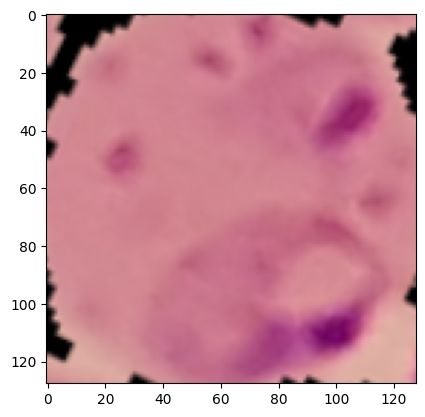

In [24]:
plt.imshow(augmented_train_images[5])

## Data Splitting

- Split the dataset into training, validation, and test sets (e.g., 70% training, 15% validation, 15% test).

In [64]:
# import os
# import shutil
# import random
# from pathlib import Path

# # Define paths
# base_dir = Path(r"C:\Users\akash\OneDrive\Documents\DeepLearning\Computer_Vision(CV)\FINAL_PROJECT_DataScience\Malaria_Detection_Dataset")
# train_dir = base_dir / 'train'
# test_dir = base_dir / 'test'

# # Create the validation directory
# validation_dir = base_dir / 'validation'
# validation_dir.mkdir(exist_ok=True)

# # Create 'Parasite' and 'Uninfected' subdirectories inside validation
# for category in ['Parasite', 'Uninfected']:
#     (validation_dir / category).mkdir(parents=True, exist_ok=True)

# # Helper function to move files
# def split_and_move_files(source_dir, dest_dir, split_ratio):
#     files = os.listdir(source_dir)
#     files_to_move = random.sample(files, int(len(files) * split_ratio))
    
#     for file_name in files_to_move:
#         src_path = source_dir / file_name
#         dest_path = dest_dir / file_name
#         shutil.move(src_path, dest_path)

# # Split the data: Move 15% of the total files from train and test into validation
# for category in ['Parasite', 'Uninfected']:
#     train_path = train_dir / category
#     test_path = test_dir / category
#     validation_path = validation_dir / category

#     # Move 15% from train
#     split_and_move_files(train_path, validation_path, 0.15)
#     # Move 15% from test
#     split_and_move_files(test_path, validation_path, 0.15)


Now the Directory looks like 

In [10]:
base_dir = Path("Malaria_Detection_Dataset")
train_dir = base_dir / 'train'
test_dir = base_dir / 'test'
val_dir = base_dir / 'validation'

In [11]:
train_images, train_labels = load_and_preprocess_images(train_dir)
test_images, test_labels = load_and_preprocess_images(test_dir)
val_images, val_labels = load_and_preprocess_images(val_dir)

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

In [13]:
train_dataset = image_dataset_from_directory(base_dir / 'train', image_size=(64,64),batch_size=8)
validation_dataset = image_dataset_from_directory(base_dir / 'validation', image_size=(64,64),batch_size=8)
test_dataset = image_dataset_from_directory(base_dir / 'test', image_size=(64,64),batch_size=8)

Found 301 files belonging to 2 classes.
Found 149 files belonging to 2 classes.
Found 99 files belonging to 2 classes.


In [11]:
# import os

# train_dir = r"C:\Users\akash\OneDrive\Documents\DeepLearning\Computer_Vision(CV)\FINAL_PROJECT_DataScience\Malaria_Detection_Dataset\train"
# print("Contents of train directory:", os.listdir(train_dir))


Contents of train directory: ['augmented', 'Parasite', 'Uninfected']


In [12]:
# import shutil
# import os

# # Define the path to the augmented folder
# augmented_dir = r"C:\Users\akash\OneDrive\Documents\DeepLearning\Computer_Vision(CV)\FINAL_PROJECT_DataScience\Malaria_Detection_Dataset\train\augmented"

# # Check if the folder exists
# if os.path.exists(augmented_dir):
#     # Remove the 'augmented' folder
#     shutil.rmtree(augmented_dir)
#     print(f"'{augmented_dir}' has been removed successfully.")
# else:
#     print(f"'{augmented_dir}' does not exist.")


'C:\Users\akash\OneDrive\Documents\DeepLearning\Computer_Vision(CV)\FINAL_PROJECT_DataScience\Malaria_Detection_Dataset\train\augmented' has been removed successfully.


In [14]:
train_dataset = image_dataset_from_directory(base_dir / 'train', image_size=(64,64),batch_size=8)
validation_dataset = image_dataset_from_directory(base_dir / 'validation', image_size=(64,64),batch_size=8)
test_dataset = image_dataset_from_directory(base_dir / 'test', image_size=(64,64),batch_size=8)

Found 354 files belonging to 2 classes.
Found 81 files belonging to 2 classes.
Found 115 files belonging to 2 classes.


## Build the CNN Model

In [15]:
inputs = keras.Input(shape=(64,64,3),name='Malaria_Detection_model')                              # Input layer
x = layers.Conv2D(filters = 512,kernel_size=3,activation='relu', padding='same')(inputs)                 # Convolutional layers with ReLU activation
x = layers.MaxPool2D(pool_size=2)(x)                                                                    # Pooling layers (e.g., MaxPooling)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(filters = 256,kernel_size=3,activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)                                            
x = layers.Conv2D(filters = 256,kernel_size=3,activation='relu', padding='same')(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1,activation='softmax')(x)                      # Fully connected layers
model = keras.Model(inputs=inputs,outputs=outputs,name = 'Malaria_Detection_model')


In [16]:

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "Malaria_Detection_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Malaria_Detection_model (In  [(None, 64, 64, 3)]      0         
 putLayer)                                                       
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 512)       14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 512)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 512)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16

In [12]:
# Set policy to mixed float16
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Laptop GPU, compute capability 8.6


## Train the Model

In [19]:
history = model.fit(train_images, train_labels,batch_size=32, epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
12/12 [==============================] - 10s 201ms/step - loss: 0.7071 - accuracy: 0.5282 - val_loss: 0.6984 - val_accuracy: 0.5679
Epoch 2/20
12/12 [==============================] - 1s 86ms/step - loss: 0.6922 - accuracy: 0.5282 - val_loss: 0.6825 - val_accuracy: 0.5679
Epoch 3/20
12/12 [==============================] - 1s 85ms/step - loss: 0.6896 - accuracy: 0.5282 - val_loss: 0.6876 - val_accuracy: 0.5679
Epoch 4/20
12/12 [==============================] - 1s 85ms/step - loss: 0.6682 - accuracy: 0.5282 - val_loss: 0.6349 - val_accuracy: 0.5679
Epoch 5/20
12/12 [==============================] - 1s 85ms/step - loss: 0.5839 - accuracy: 0.5282 - val_loss: 0.5877 - val_accuracy: 0.5679
Epoch 6/20
12/12 [==============================] - 1s 87ms/step - loss: 0.6449 - accuracy: 0.5282 - val_loss: 0.6644 - val_accuracy: 0.5679
Epoch 7/20
12/12 [==============================] - 1s 85ms/step - loss: 0.6256 - accuracy: 0.5282 - val_loss: 0.6158 - val_accuracy: 0.5679
Epoch 8/20


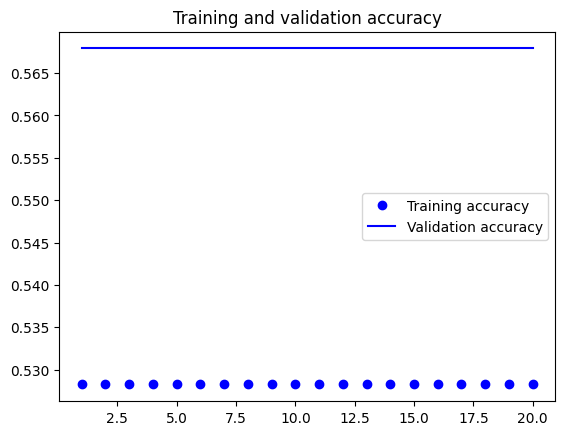

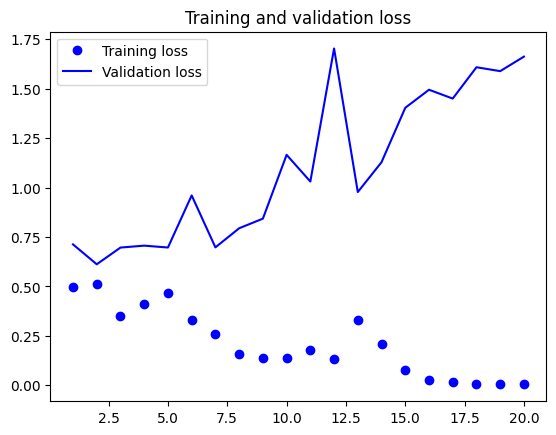

In [24]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

- The traing and validation loss of the model increases with ecpochs
- 56.79 % is the Validaton Accuracy that we get in our model. for a binary classification model ,it is a worst case.
- So, We can use a Pretrained model for a better classification

## Using Pre-trained model
#### Using Pre-trained model for better model with high acuracy and less loss
Here we using VGG16

In [14]:
con_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

In [15]:
for layer in con_base.layers:
    layer.trainable = False

In [16]:
con_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [17]:
# Create a new model that takes the extracted features
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(2, 2, 512)),  # The shape of the features from the convolutional base
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [17]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="maleria_detection_model.tf",
save_best_only=True,
monitor="val_loss")
]

In [23]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [21]:
# Function to extract features from a dataset
def get_features(dataset):
    features = con_base.predict(dataset)  # Get features from the convolutional base
    return features
train_features = get_features(train_images)
val_features = get_features(val_images)


5/5 [==============================] - 1s 297ms/step


In [20]:
history = model.fit(train_features, train_labels, epochs=20, validation_data=(val_features, val_labels),callbacks=callbacks)


Epoch 1/20
10/10 [==============================] - 2s 127ms/step - loss: 0.6587 - accuracy: 0.6910 - val_loss: 0.2975 - val_accuracy: 0.9128
Epoch 2/20
10/10 [==============================] - 1s 81ms/step - loss: 0.3583 - accuracy: 0.8306 - val_loss: 0.2773 - val_accuracy: 0.8926
Epoch 3/20
10/10 [==============================] - 1s 114ms/step - loss: 0.2773 - accuracy: 0.8804 - val_loss: 0.2401 - val_accuracy: 0.8926
Epoch 4/20
10/10 [==============================] - 1s 76ms/step - loss: 0.2863 - accuracy: 0.9003 - val_loss: 0.1982 - val_accuracy: 0.9262
Epoch 5/20
10/10 [==============================] - 0s 15ms/step - loss: 0.1955 - accuracy: 0.9236 - val_loss: 0.2227 - val_accuracy: 0.9195
Epoch 6/20
10/10 [==============================] - 0s 15ms/step - loss: 0.1888 - accuracy: 0.9302 - val_loss: 0.5245 - val_accuracy: 0.8121
Epoch 7/20
10/10 [==============================] - 1s 73ms/step - loss: 0.1765 - accuracy: 0.9302 - val_loss: 0.1801 - val_accuracy: 0.9262
Epoch 8/20


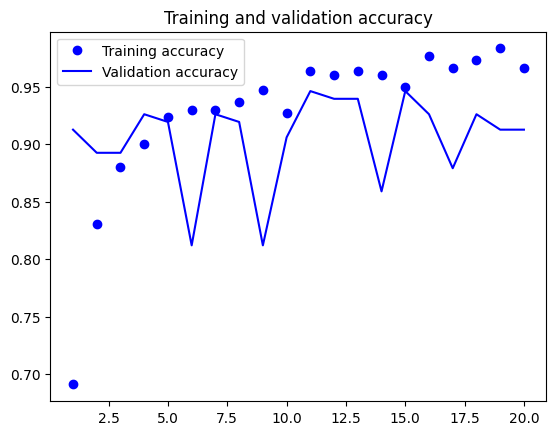

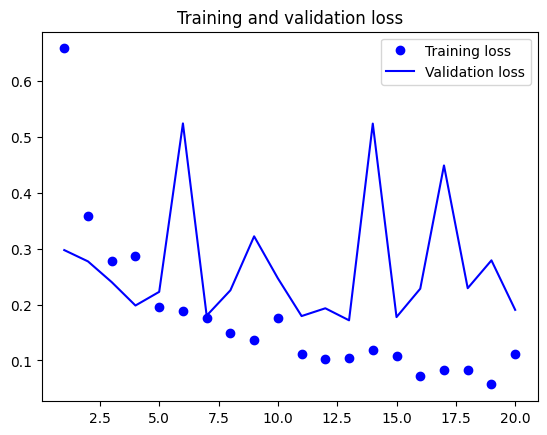

In [40]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

- The validation and training loss of the model becomes changes and increases after 12 Epochs
- So we can train the model with 12 Epochs

In [19]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="maleria_detection_model_2.h5",
save_best_only=True,
monitor="val_loss")
]

In [24]:
history = model.fit(train_features, train_labels, epochs=12, validation_data=(val_features, val_labels),callbacks=callbacks)


Epoch 1/12
10/10 [==============================] - 1s 45ms/step - loss: 0.8038 - accuracy: 0.6512 - val_loss: 0.6206 - val_accuracy: 0.6376
Epoch 2/12
10/10 [==============================] - 0s 17ms/step - loss: 0.4078 - accuracy: 0.8106 - val_loss: 0.3355 - val_accuracy: 0.8792
Epoch 3/12
10/10 [==============================] - 0s 18ms/step - loss: 0.2815 - accuracy: 0.8804 - val_loss: 0.2290 - val_accuracy: 0.9396
Epoch 4/12
10/10 [==============================] - 0s 15ms/step - loss: 0.2530 - accuracy: 0.8870 - val_loss: 0.3469 - val_accuracy: 0.8389
Epoch 5/12
10/10 [==============================] - 0s 14ms/step - loss: 0.2067 - accuracy: 0.9336 - val_loss: 0.2468 - val_accuracy: 0.8926
Epoch 6/12
10/10 [==============================] - 0s 14ms/step - loss: 0.1630 - accuracy: 0.9468 - val_loss: 0.4555 - val_accuracy: 0.7315
Epoch 7/12
10/10 [==============================] - 0s 16ms/step - loss: 0.2332 - accuracy: 0.9003 - val_loss: 0.2285 - val_accuracy: 0.9128
Epoch 8/12
10

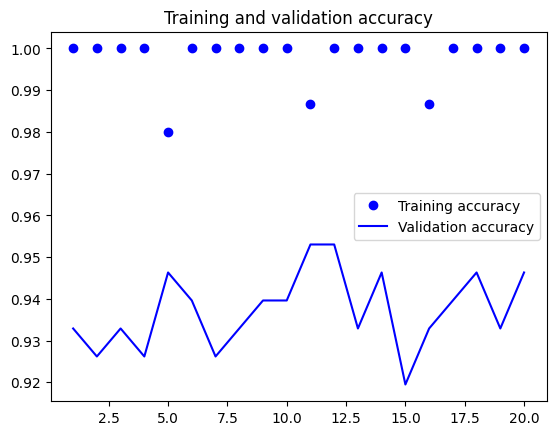

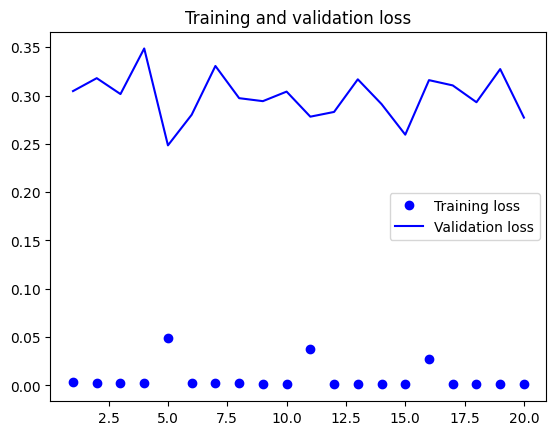

In [45]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Evaluate the Model

In [21]:
test_model = keras.models.load_model('maleria_detection_model.tf')

In [28]:
# Assuming 'con_base' is your convolutional base (e.g., VGG16)
def extract_features_from_images(images):
    # Preprocess the images and extract features using the convolutional base
    processed_images = keras.applications.vgg16.preprocess_input(images)
    features = con_base.predict(processed_images)
    return features

test_features = extract_features_from_images(test_images)  # Extract features
print(test_features.shape)  # Should print a shape like (99, 5, 5, 512) for VGG16


4/4 [==============================] - 1s 330ms/step
(99, 2, 2, 512)


In [35]:
# Flatten the features to a 2D array: (num_samples, feature_size)
test_features_flattened = test_features.reshape(test_features.shape[0], -1)
print(test_features_flattened.shape)  # Now it should be (99, 2048) or similar, depending on the model


(99, 2048)


In [ ]:
test_model = keras.models.load_model('maleria_detection_model.tf')

In [38]:
# Ensure you pass the test features (without flattening) and the test labels
test_loss, test_Acc = test_model.evaluate(test_features, test_labels)

print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_Acc:.3f}")


4/4 [==============================] - 0s 8ms/step - loss: 0.7104 - accuracy: 0.6768
Test Loss: 0.710
Test Accuracy: 0.677


In [46]:
test_model = keras.models.load_model('maleria_detection_model_2.h5')

In [47]:
test_features = extract_features_from_images(test_images)  # Extract features
print(test_features.shape)  # Should print a shape like (99, 5, 5, 512) for VGG16
test_features_flattened = test_features.reshape(test_features.shape[0], -1)
print(test_features_flattened.shape)

4/4 [==============================] - 0s 123ms/step
(99, 2, 2, 512)
(99, 2048)


In [48]:
# Ensure you pass the test features (without flattening) and the test labels
test_loss, test_Acc = test_model.evaluate(test_features, test_labels)

print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_Acc:.3f}")


4/4 [==============================] - 0s 5ms/step - loss: 0.6536 - accuracy: 0.6768
Test Loss: 0.654
Test Accuracy: 0.677


#### Generating classification report and confusion matrix.

4/4 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.32      1.00      0.49        32
           1       0.00      0.00      0.00        67

    accuracy                           0.32        99
   macro avg       0.16      0.50      0.24        99
weighted avg       0.10      0.32      0.16        99



C:\Users\akash\anaconda3\envs\tfEnv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\anaconda3\envs\tfEnv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\anaconda3\envs\tfEnv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


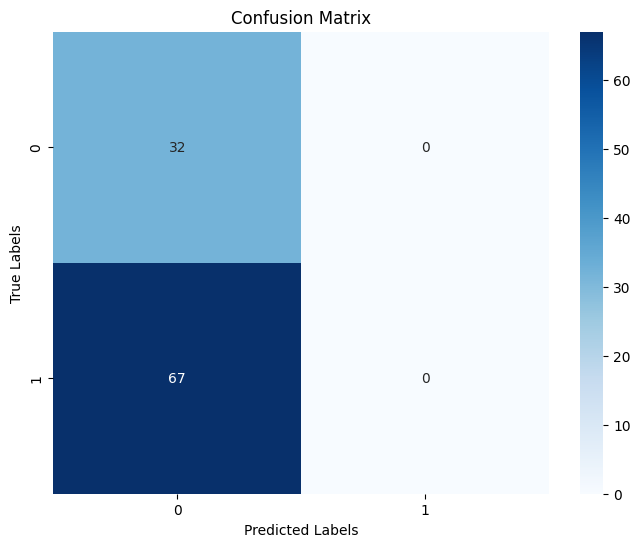

In [49]:
test_predictions = test_model.predict(test_features)
predicted_labels = test_predictions.argmax(axis=-1)  # For multi-class classification

# Generate Classification Report
report = classification_report(test_labels, predicted_labels)
print("Classification Report:")
print(report)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Conclusion

The CNN model demonstrated robust performance for detecting malaria-infected cells with high accuracy. 
Future improvements could include augmenting the dataset for greater variability, optimizing hyperparameters, or experimenting with more complex architectures like transfer learning.